In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
import numpy as np

In [2]:
PR_matrix = pd.read_csv('Precision_Recall_across_iterations.csv', header=None, index_col=0, delimiter=';')
PR_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi_P,1.000000,0.888889,1.000000,0.882353,0.842105,0.941176,0.888889,0.944444,0.818182,0.941176,0.875000,0.818182,0.894737,0.882353,0.850000,1.000000,0.947368,0.941176,0.800000,0.882353
RF_SG_msi_R,0.882353,0.888889,0.882353,0.882353,0.941176,0.888889,0.941176,0.944444,1.000000,0.941176,0.777778,1.000000,0.944444,0.882353,0.944444,0.941176,1.000000,0.888889,0.941176,0.833333
XGB_SG_msi_P,1.000000,0.809524,1.000000,0.941176,0.923077,0.941176,0.875000,0.875000,0.882353,0.882353,0.928571,0.850000,0.894737,0.866667,0.882353,0.888889,0.937500,1.000000,0.888889,0.866667
XGB_SG_msi_R,0.941176,0.944444,0.823529,0.941176,0.705882,0.888889,0.823529,0.777778,0.833333,0.882353,0.722222,0.944444,0.944444,0.764706,0.833333,0.941176,0.833333,0.944444,0.941176,0.722222
RF_SG_stage_P,0.666667,0.727273,0.538462,0.700000,0.785714,0.687500,0.666667,0.800000,0.800000,0.692308,0.769231,0.750000,0.666667,0.769231,0.833333,0.642857,0.666667,0.800000,0.833333,0.800000
RF_SG_stage_R,0.615385,0.571429,0.538462,0.538462,0.846154,0.785714,0.615385,0.571429,0.571429,0.692308,0.714286,0.857143,0.857143,0.769231,0.714286,0.692308,0.428571,0.571429,0.384615,0.571429
XGB_SG_stage_P,0.818182,0.727273,0.636364,0.666667,0.733333,0.769231,0.545455,0.818182,0.750000,0.692308,0.562500,0.705882,0.705882,0.714286,0.833333,0.692308,0.700000,0.777778,0.666667,0.818182
XGB_SG_stage_R,0.692308,0.571429,0.538462,0.615385,0.846154,0.714286,0.461538,0.642857,0.642857,0.692308,0.642857,0.857143,0.857143,0.769231,0.714286,0.692308,0.500000,0.500000,0.461538,0.642857
RF_SG_TL_P,0.853869,0.834573,0.719990,0.915179,0.829613,0.790923,0.775347,0.893750,0.788889,0.847470,0.804167,0.899554,0.747470,0.730556,0.801587,0.827083,0.891098,0.864583,0.871032,0.784077


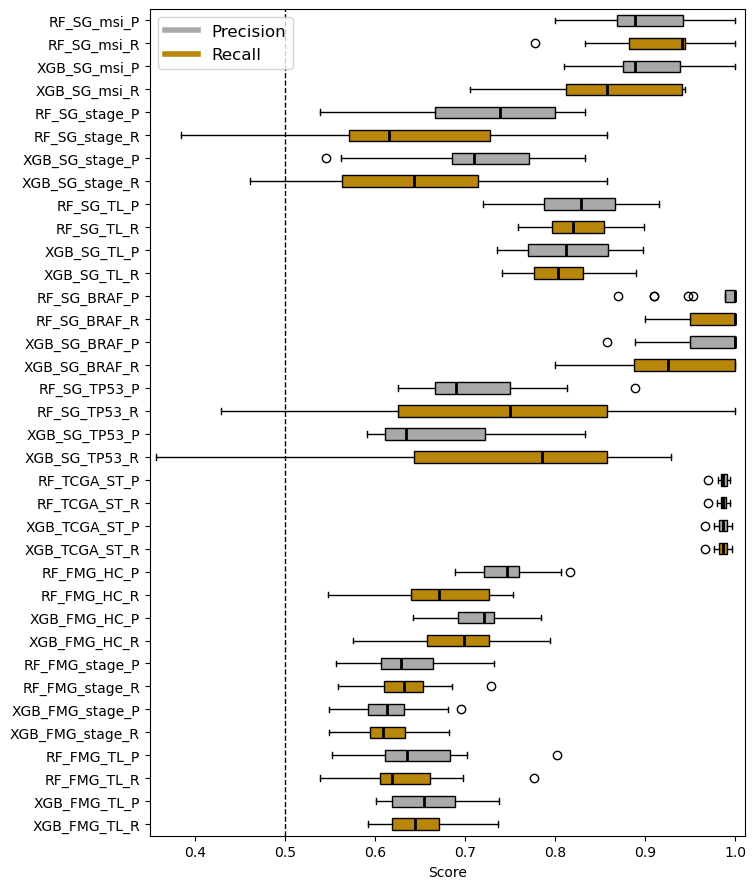

             Label  Median Value
0      RF_SG_msi_P      0.888889
1      RF_SG_msi_R      0.941176
2     XGB_SG_msi_P      0.888889
3     XGB_SG_msi_R      0.857843
4    RF_SG_stage_P      0.738636
5    RF_SG_stage_R      0.615385
6   XGB_SG_stage_P      0.710084
7   XGB_SG_stage_R      0.642857
8       RF_SG_TL_P      0.828348
9       RF_SG_TL_R      0.819940
10     XGB_SG_TL_P      0.812450
11     XGB_SG_TL_R      0.803571
12    RF_SG_BRAF_P      1.000000
13    RF_SG_BRAF_R      1.000000
14   XGB_SG_BRAF_P      1.000000
15   XGB_SG_BRAF_R      0.925000
            Label  Median Value
16   RF_SG_TP53_P      0.689904
17   RF_SG_TP53_R      0.750000
18  XGB_SG_TP53_P      0.633971
19  XGB_SG_TP53_R      0.785714
20   RF_TCGA_ST_P      0.986080
21   RF_TCGA_ST_R      0.985859
22  XGB_TCGA_ST_P      0.986227
23  XGB_TCGA_ST_R      0.985859
24    RF_FMG_HC_P      0.746016
25    RF_FMG_HC_R      0.671233
26   XGB_FMG_HC_P      0.720427
27   XGB_FMG_HC_R      0.698630


In [38]:

df = PR_matrix.transpose()

# Define colors for the groups
P_color = 'darkgrey' 
R_color = 'darkgoldenrod'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 12

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))  # Adjust size as necessary

# Create boxplot
bp = ax.boxplot(df.values, vert=False, patch_artist=True)

# Initialize a list to store median values
median_values = []

# Color the boxplots and extract median values
for i, (patch, median) in enumerate(zip(bp['boxes'], bp['medians'])):
    label = PR_matrix.index[i]
    if label.lower().endswith('_r'):
        patch.set_facecolor(R_color)
    elif label.lower().endswith('_p'):
        patch.set_facecolor(P_color)

    # Change the color and line width of the median line
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    
    # Extract and store the median value
    median_value = median.get_xdata()[1]  # get_xdata() returns [x0, x1], we need x1
    median_values.append(median_value)
    
# Add vertical dashed line at x=0.5
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)

# Customize labels and title
ax.set_yticklabels(PR_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.35, 1.01)
ax.set_xlabel('Score', fontsize=label_fontsize)
ax.invert_yaxis()

# Add legend outside the plot on the right side
handles = [plt.Line2D([0], [0], color=P_color, lw=4),
           plt.Line2D([0], [0], color=R_color, lw=4)]
labels = ['Precision', 'Recall']
#ax.legend(handles, labels, fontsize=label_fontsize)#, loc='upper left')
legend = ax.legend(handles, labels, loc='upper left',fontsize=legend_fontsize)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()

# Create a DataFrame to store and display median values
median_df = pd.DataFrame({
    'Label': PR_matrix.index,
    'Median Value': median_values
})

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(median_df[0:16])
print(median_df[16:28])

In [31]:
one_row = PR_matrix.iloc[34]
other_row = PR_matrix.iloc[35]

t, p =ttest_ind(one_row, other_row)

print(f"P-value: {p:.3e}")

P-value: 6.399e-01


In [3]:
F1score_matrix = pd.read_csv('F1score_across_iterations.csv', header=None, index_col=0, delimiter=';')
F1score_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi,0.937500,0.888889,0.937500,0.882353,0.888889,0.914286,0.914286,0.944444,0.900000,0.941176,0.823529,0.900000,0.918919,0.882353,0.894737,0.969697,0.972973,0.914286,0.864865,0.857143
XGB_SG_msi,0.969697,0.871795,0.903226,0.941176,0.800000,0.914286,0.848485,0.823529,0.857143,0.882353,0.812500,0.894737,0.918919,0.812500,0.857143,0.914286,0.882353,0.971429,0.914286,0.787879
RF_SG_stage,0.640000,0.640000,0.538462,0.608696,0.814815,0.733333,0.640000,0.666667,0.666667,0.692308,0.740741,0.800000,0.750000,0.769231,0.769231,0.666667,0.521739,0.666667,0.526316,0.666667
XGB_SG_stage,0.750000,0.640000,0.583333,0.640000,0.785714,0.740741,0.500000,0.720000,0.692308,0.692308,0.600000,0.774194,0.774194,0.740741,0.769231,0.692308,0.583333,0.608696,0.545455,0.720000
RF_SG_TL,0.805863,0.780643,0.749164,0.883745,0.814744,0.777427,0.754489,0.870665,0.767278,0.849954,0.788461,0.883691,0.756146,0.734510,0.788850,0.822846,0.841644,0.812202,0.852843,0.784848
XGB_SG_TL,0.724382,0.821126,0.758974,0.831848,0.705245,0.768414,0.740375,0.793590,0.749106,0.762297,0.796581,0.796542,0.805727,0.741159,0.805244,0.799857,0.882747,0.791659,0.885964,0.763546
RF_SG_BRAF,1.000000,0.947368,0.974359,0.974359,0.974359,0.930233,1.000000,0.974359,0.952381,0.974359,0.947368,1.000000,0.923077,1.000000,0.952381,1.000000,1.000000,0.975610,0.947368,1.000000
XGB_SG_BRAF,1.000000,0.923077,0.918919,0.947368,0.947368,0.974359,1.000000,0.974359,0.878049,0.918919,0.947368,1.000000,0.842105,0.974359,0.975610,0.894737,1.000000,0.975610,0.894737,0.950000
RF_SG_TP53,0.709677,0.615385,0.733333,0.750000,0.640000,0.785714,0.740741,0.800000,0.848485,0.709677,0.666667,0.545455,0.750000,0.800000,0.695652,0.866667,0.689655,0.666667,0.642857,0.615385


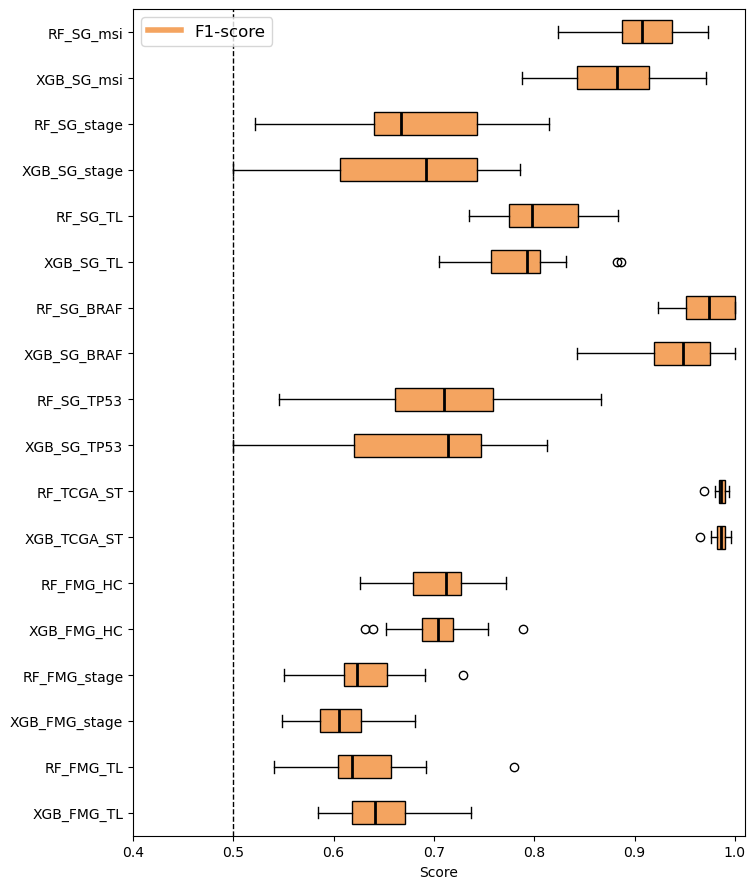

            Label  Median Value
0       RF_SG_msi      0.907143
1      XGB_SG_msi      0.882353
2     RF_SG_stage      0.666667
3    XGB_SG_stage      0.692308
4        RF_SG_TL      0.797357
5       XGB_SG_TL      0.792624
6      RF_SG_BRAF      0.974359
7     XGB_SG_BRAF      0.948684
8      RF_SG_TP53      0.709677
9     XGB_SG_TP53      0.714052
10     RF_TCGA_ST      0.985819
11    XGB_TCGA_ST      0.985799
12      RF_FMG_HC      0.711753
13     XGB_FMG_HC      0.703837
14   RF_FMG_stage      0.623455
15  XGB_FMG_stage      0.605544
16      RF_FMG_TL      0.618659
17     XGB_FMG_TL      0.640845


In [40]:
df1 = F1score_matrix.transpose()

# Define colors for the groups
box_color = 'sandybrown'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 12

# Plotting
fig, ax = plt.subplots(figsize=(9, 9))  # Adjust size as necessary

# Create boxplot
bp = ax.boxplot(df1.values, vert=False, patch_artist=True)

median_values=[]
# Change the color of the boxes
for box in bp['boxes']:
    box.set_facecolor(box_color)

# Change the color and linewidth of the median lines
for median in bp['medians']:
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    # Extract and store the median value
    median_value = median.get_xdata()[1]  # get_xdata() returns [x0, x1], we need x1
    median_values.append(median_value)

# Add vertical dashed line at x=0.5
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
# Customize labels and title
ax.set_yticklabels(F1score_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('Score', fontsize=label_fontsize)
ax.invert_yaxis()

# Add legend outside the plot on the right side
handles = [plt.Line2D([0], [0], color=box_color, lw=4)]
labels = ['F1-score']
legend = ax.legend(handles, labels, loc='upper left', fontsize=legend_fontsize)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Show plot
plt.show()

# Create a DataFrame to store and display median values
median_df = pd.DataFrame({
    'Label': F1score_matrix.index,
    'Median Value': median_values
})

# Set pandas options to display all rows
pd.set_option('display.max_rows', None)

# Display the DataFrame
print(median_df)

In [12]:
one_row = F1score_matrix.iloc[16]
other_row = F1score_matrix.iloc[17]

t, p =ttest_ind(one_row, other_row)

print(f"P-value: {p:.3e}")

P-value: 3.704e-01
